In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.cluster import KMeans

# Data Collection and Analysis

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Check Missing Values

In [6]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Check Duplicate Values

In [7]:
print(data.duplicated().value_counts())
data.drop_duplicates(inplace = True)
print(len(data))

False    200
Name: count, dtype: int64
200


# Data Visualization

In [8]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

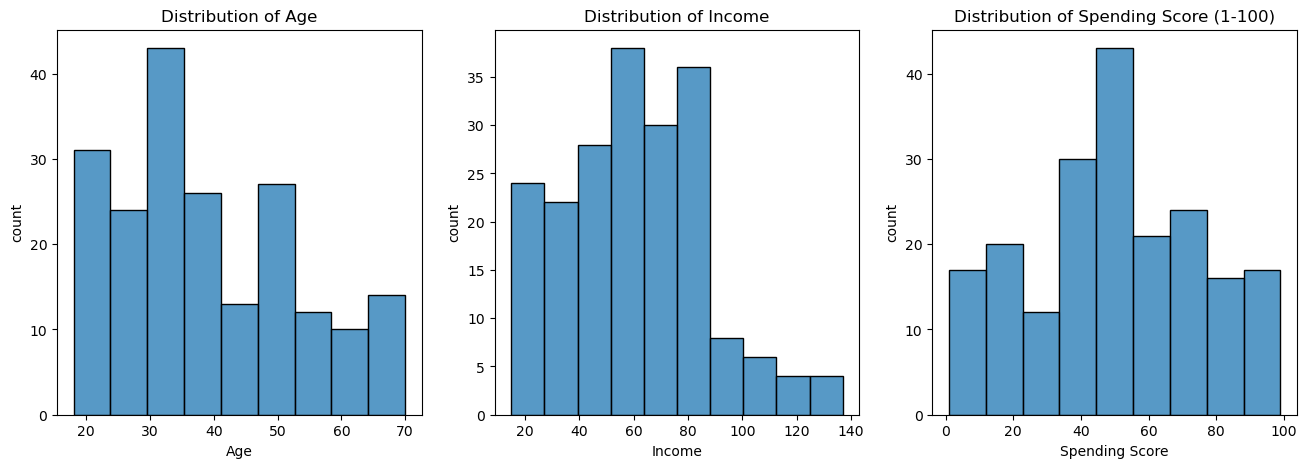

In [9]:
plt.figure(figsize =(16,5))

plt.subplot(1, 3 , 1)
sns.histplot(data['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("count")

plt.subplot(1, 3 , 2)
sns.histplot(data['Annual Income (k$)'])
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("count")

plt.subplot(1, 3 , 3)
sns.histplot(data['Spending Score (1-100)'])
plt.title("Distribution of Spending Score (1-100)")
plt.xlabel("Spending Score")
plt.ylabel("count")

plt.show()

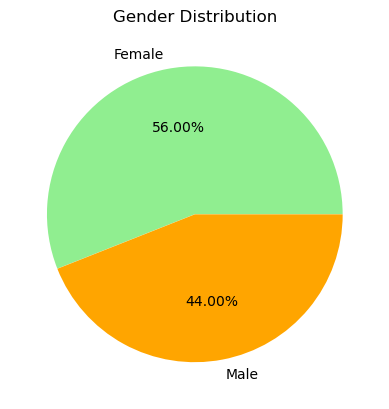

In [10]:
df = data.groupby('Genre').size()
df.plot(kind='pie', subplots=True, colors = ['Lightgreen', 'Orange'], explode = [0, 0.001],
       labels = df.index, autopct = '%.2f%%')
plt.title("Gender Distribution")
plt.show()

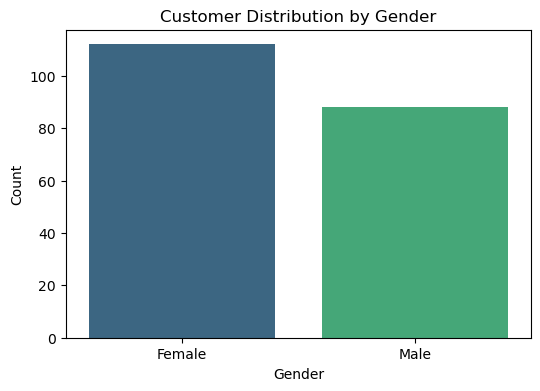

In [11]:
gender_count = data['Genre'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_count.index, y=gender_count.values, palette='viridis')
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

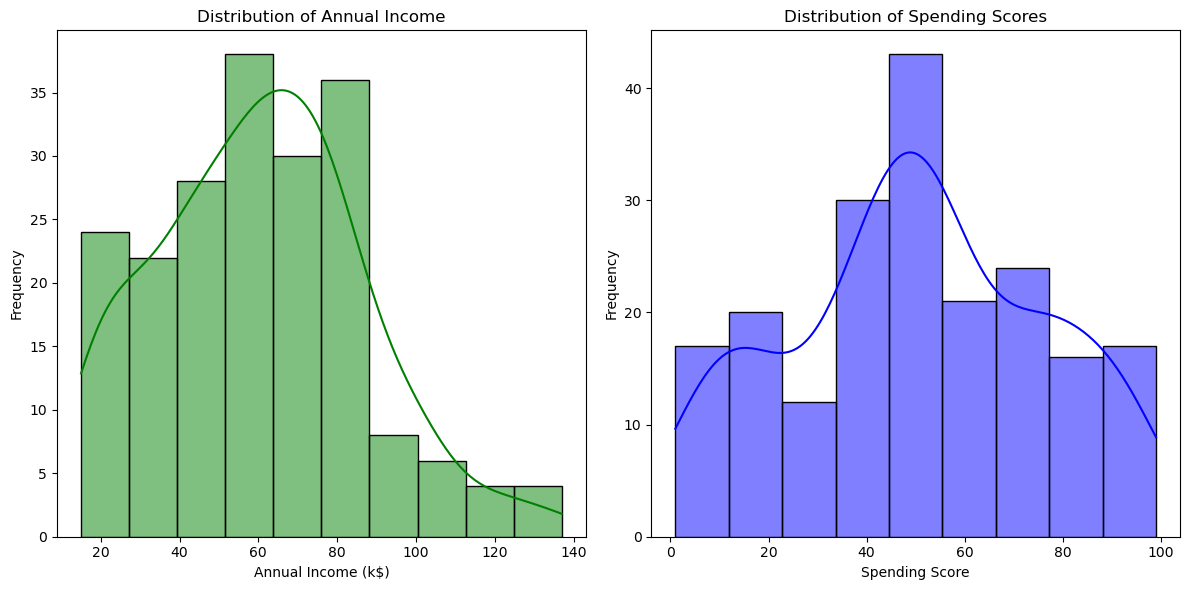

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.histplot(data['Spending Score (1-100)'], kde=True, color='blue')
plt.title('Distribution of Spending Scores')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 1)
sns.histplot(data['Annual Income (k$)'], kde=True, color='green')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

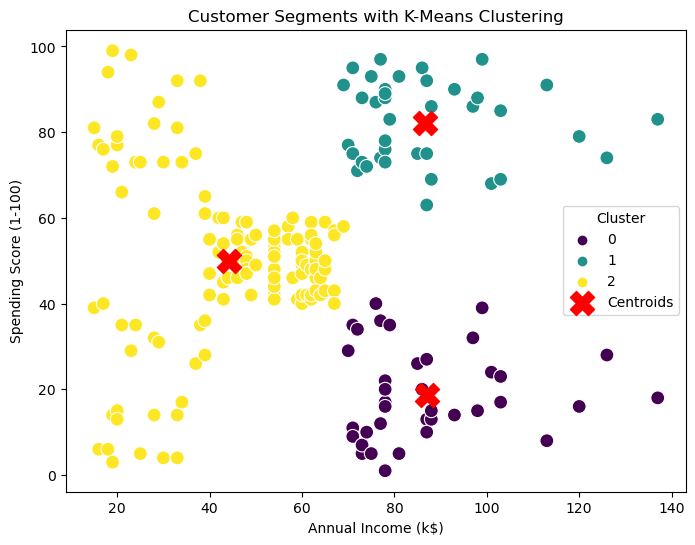

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('Customer Segments with K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

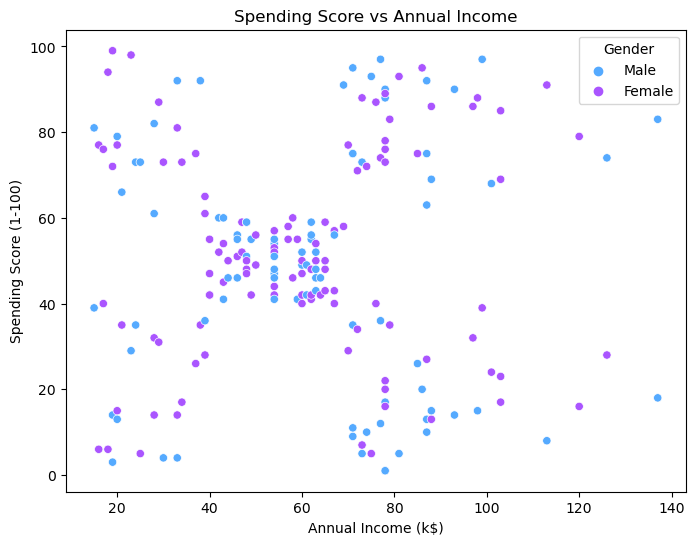

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', palette='cool')
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

In [15]:
cluster_profile = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_profile)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 87.000000               18.631579
1                 86.538462               82.128205
2                 44.154472               49.829268


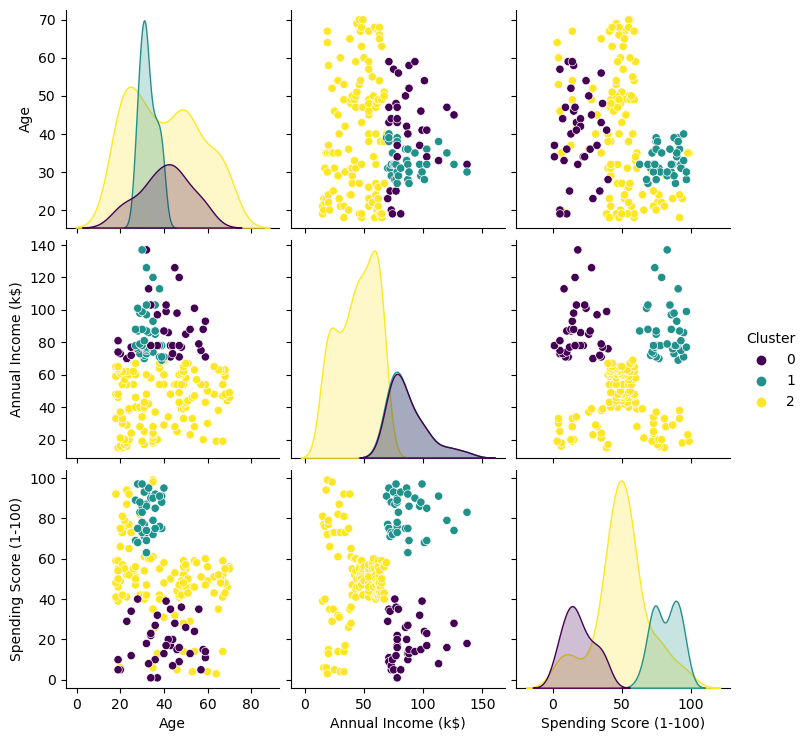

In [16]:
sns.pairplot(data, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Cluster', palette='viridis')
plt.show()

## Conclusion

### This project on Customer Segmentation using K-Means Clustering enabled the identification of distinct customer groups based on their annual income and spending scores. The visualizations provided insights into customer behavior, gender distribution, and spending patterns, which can be used to develop targeted marketing strategies and enhance customer engagement.

### Through this project, I gained hands-on experience in clustering techniques, data visualization, and profiling customer segments. By applying these techniques, businesses can personalize their offerings, optimize resource allocation, and improve overall customer satisfaction, thereby driving growth and profitability.

### This project underscores the importance of data-driven decision-making in understanding and catering to diverse customer needs.